In [2]:
import numpy as np
import  pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')

import numpy as np
import gc
import os
import sys
import cv2
import itertools
from PIL import Image

import random

from tqdm import tqdm


# Compare RMSE
---

In [3]:
path1="../output/analysis/cyclegan_pytorch_/rmse_cossim_data.pkl"
path2="../output/analysis/cyclegan_unpaired_ver5.1.0/rmse_cossim_data.pkl"
df1=pd.read_pickle(path1)
df2=pd.read_pickle(path2)

In [4]:
display(df1.head())
display(df2.head())

,rmse,cos_sim
0,9.618208,1.611895e-07
1,10.545499,1.685602e-07
2,10.463629,3.197927e-08
3,10.419583,4.381270e-07
4,10.328609,1.762458e-07


,rmse,cos_sim
0,9.607747,9.878225e-08
1,9.137030,7.591069e-07
2,9.071620,3.570387e-07
3,9.131197,4.412178e-07
4,8.768257,8.272390e-09


In [5]:
df1.describe()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,10.432934,4.351693e-07
std,0.458921,3.550295e-07
min,8.667758,2.005561e-08
25%,10.253638,1.612028e-07
50%,10.552651,2.949939e-07
75%,10.737365,6.681458e-07
max,11.228125,1.480864e-06


In [6]:
df2.describe()
# df2.rmse.median()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,8.396460,1.043998e-06
std,1.453287,9.782662e-07
min,4.035147,0.000000e+00
25%,7.473910,3.421883e-07
50%,8.667443,7.583170e-07
75%,9.614685,1.506872e-06
max,10.689717,4.263544e-06


Text(0, 0.5, 'RMSE [-]')

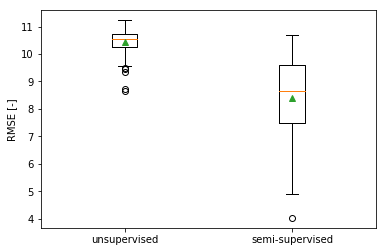

In [7]:
# sns.set()
# sns.set_style('whitegrid')
# sns.set_palette('gray')
plt.boxplot([df1.rmse,df2.rmse],labels=["unsupervised","semi-supervised"],showmeans=True)
plt.ylabel("RMSE [-]")

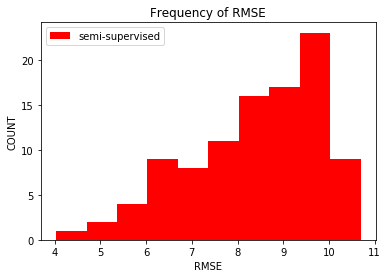

In [8]:
plt.hist(df2.rmse,bins=10, histtype='stepfilled',label="semi-supervised", color='r')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

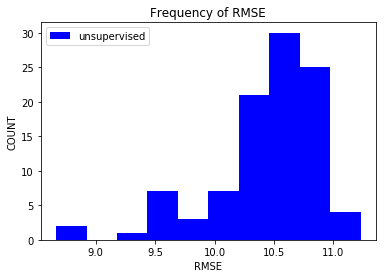

In [9]:
plt.hist(df1.rmse,bins=10, histtype='stepfilled',label="unsupervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

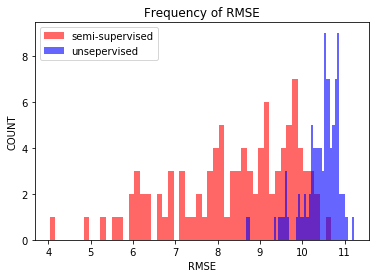

In [10]:
plt.hist(df2.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="semi-supervised", color='r')
plt.hist(df1.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="unsepervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

# Compare Image
---

In [11]:
def get_images(folder,num=100):
    fake_path=os.listdir(folder+"fake")
    depth_path=os.listdir(folder+"depth")
    color_path=os.listdir(folder+"color")
    cycle_path=os.listdir(folder+"cycle")
    images={"fake":[],"depth":[],"color":[],"cycle":[]}
    for i in range(num):
        fake=cv2.imread(f"{folder}fake/{fake_path[i]}",0)
        depth=cv2.imread(f"{folder}depth/{depth_path[i]}",0)
        color=cv2.imread(f"{folder}color/{color_path[i]}")
        cycle=cv2.imread(f"{folder}cycle/{cycle_path[i]}")
        images["fake"].append(fake)
        images["depth"].append(depth)
        images["color"].append(color)
        images["cycle"].append(cycle)
    return images

In [12]:
im_path1="../output/analysis/cyclegan_pytorch_/"
im_path2="../output/analysis/cyclegan_unpaired_ver5.1.0/"

im_semi=get_images(im_path2)
im_un=get_images(im_path1)

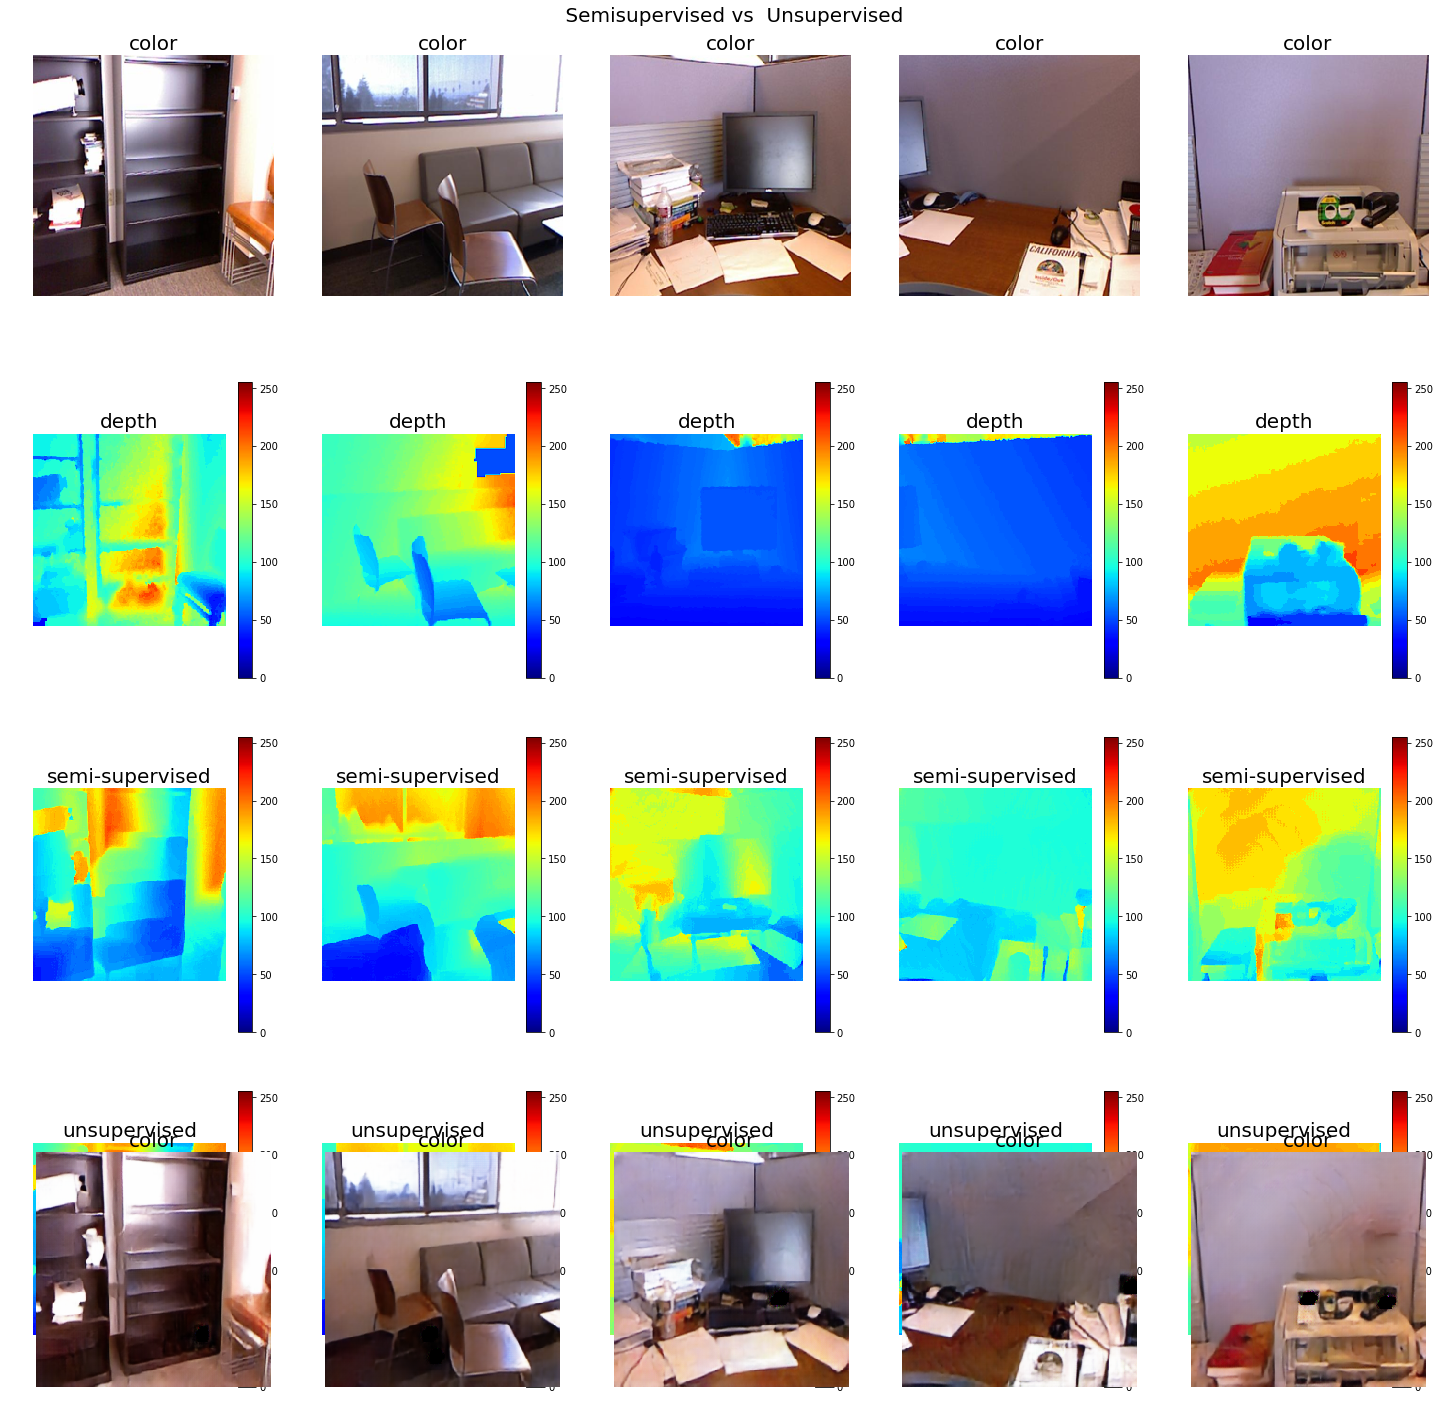

In [13]:
fig=plt.figure(figsize=(25,25))
plt.title(" Semisupervised vs  Unsupervised",fontsize=20)
plt.axis("off")

for i in range(5):

    ax=fig.add_subplot(4,5,i+1)
    ax.set_title("color",fontsize=20)
    ax.imshow(im_semi["color"][i])
    ax.axis("off")

    ax=fig.add_subplot(4,5,i+1+5)
    ax.set_title("depth",fontsize=20)
    a=ax.imshow(im_semi["depth"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5)
    ax.set_title("semi-supervised",fontsize=20)
    a=ax.imshow(im_semi["fake"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5+5)
    ax.set_title("unsupervised",fontsize=20)
    a=ax.imshow(im_un["fake"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(5,5,i+1+5*4)
    ax.set_title("color",fontsize=20)
    ax.imshow(im_semi["cycle"][i])
    ax.axis("off")
    

(-0.5, 255.5, 255.5, -0.5)

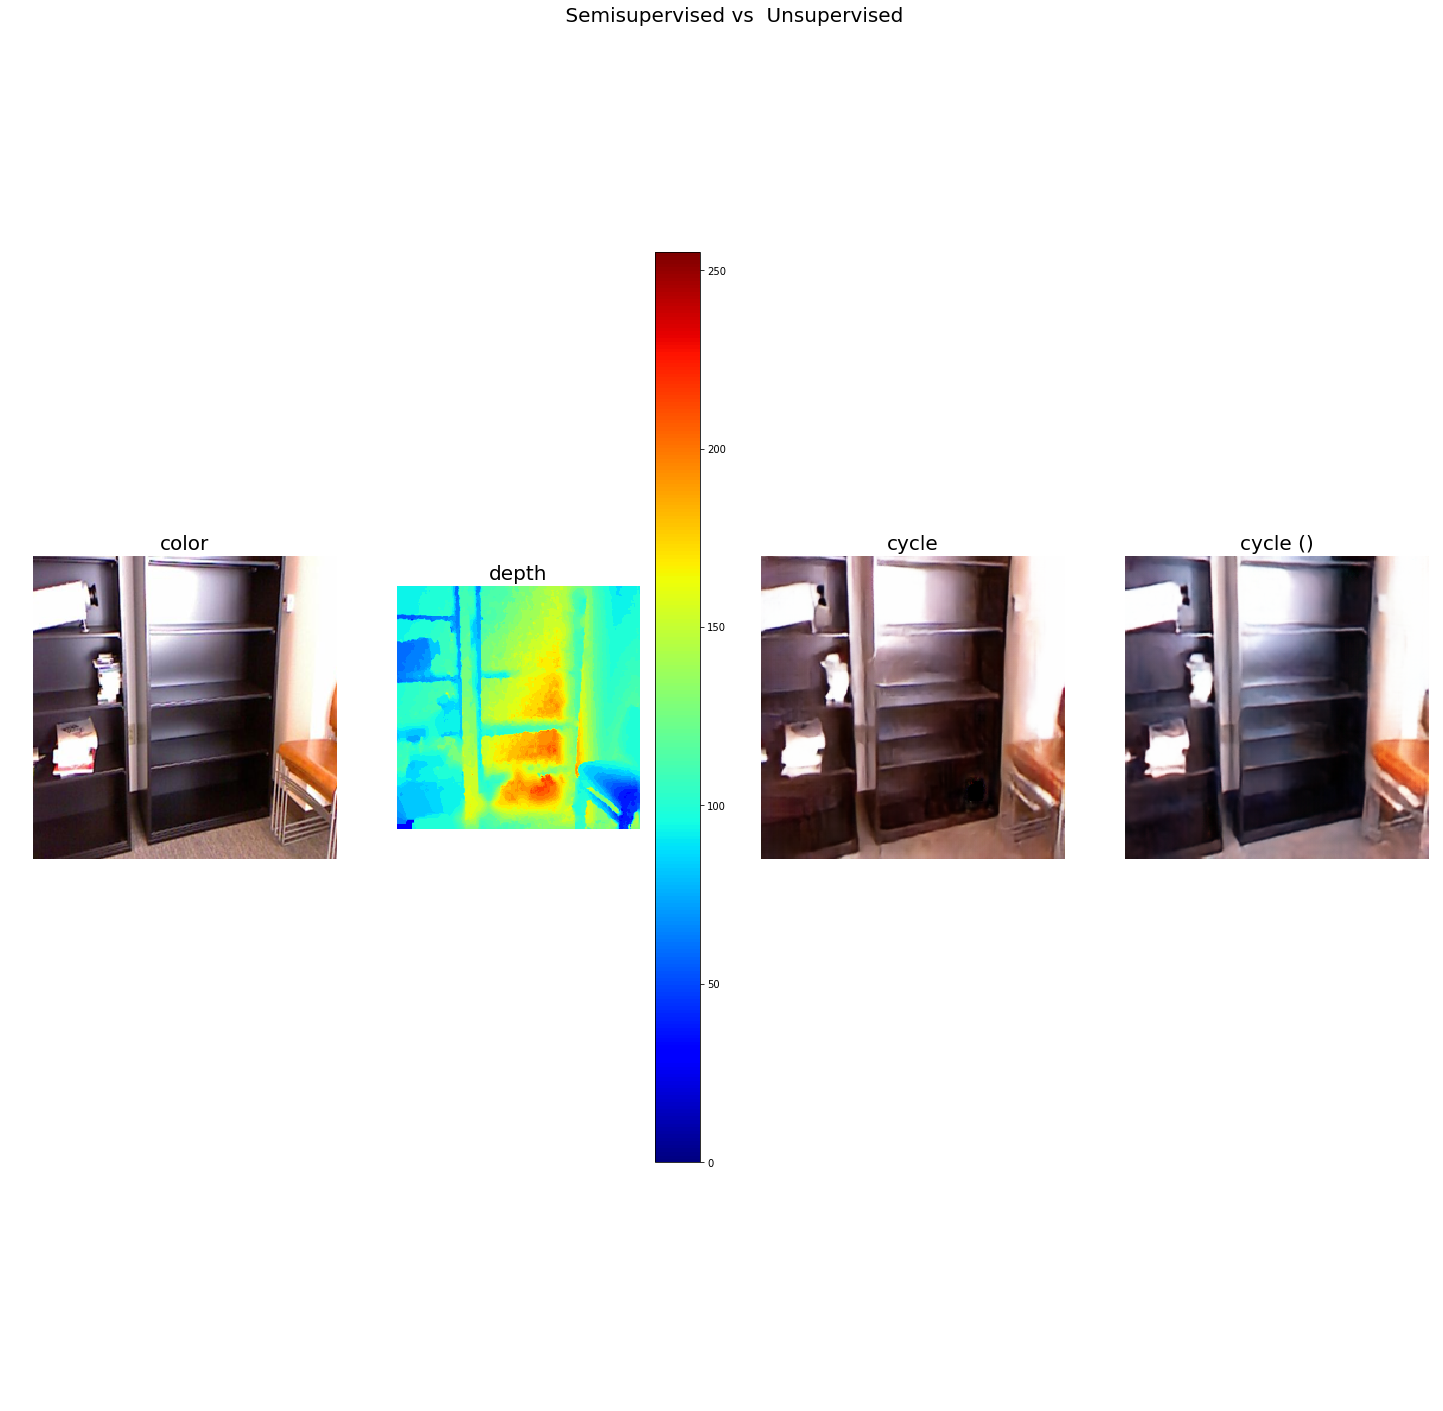

In [ ]:
fig=plt.figure(figsize=(25,25))
plt.title(" Semisupervised vs  Unsupervised",fontsize=20)
plt.axis("off")
ax=fig.add_subplot(1,4,1)
ax.set_title("color",fontsize=20)
ax.imshow(im_semi["color"][0])
ax.axis("off")

ax=fig.add_subplot(1,4,2)
ax.set_title("depth",fontsize=20)
a=ax.imshow(im_semi["depth"][0],cmap="jet", vmin = 0, vmax =255)
ax.axis("off")
fig.colorbar(a, ax=ax)

ax=fig.add_subplot(1,4,3)
ax.set_title("cycle",fontsize=20)
ax.imshow(im_semi["cycle"][0])
ax.axis("off")

ax=fig.add_subplot(1,4,4)
ax.set_title("cycle ()",fontsize=20)
ax.imshow(im_un["cycle"][0])
ax.axis("off")


In [ ]:
def describe(x):
    print(f"mean: {np.mean(x)}")
    print(f"median: {np.median(x)}")
    print(f"std: {np.std(x)}")
    print(f"max: {np.max(x)}")
    print(f"min: {np.min(x)}")

(0, 6000)

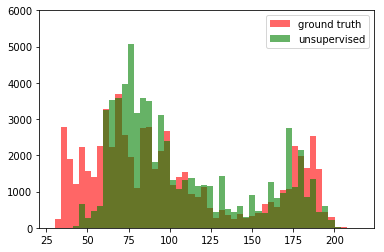

In [ ]:
ind =  np.argsort(np.abs(df2.rmse -float(df2.rmse.mean())))[0]
# plt.hist(cv2.cvtColor(im_semi["color"][ind],cv2.COLOR_RGB2GRAY).reshape(-1),label="rgb image",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(im_semi["depth"][ind].reshape(-1),color="r",label="ground truth",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(im_un["fake"][ind].reshape(-1),color="g",label="unsupervised",bins=50, histtype='stepfilled', alpha=0.6,)
# plt.hist(im_semi["fake"][ind].reshape(-1),color="b",label="semi-supervised",bins=50, histtype='stepfilled', alpha=0.4,)
plt.legend()
plt.ylim([0,6000])


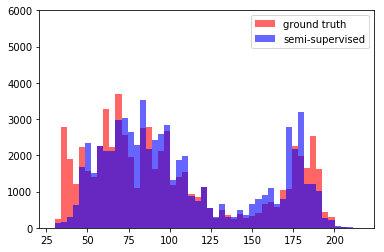

In [ ]:
ind =  np.argsort(np.abs(df2.rmse -float(df2.rmse.mean())))[0]
# plt.hist(cv2.cvtColor(im_semi["color"][ind],cv2.COLOR_RGB2GRAY).reshape(-1),label="rgb image",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(im_semi["depth"][ind].reshape(-1),color="r",label="ground truth",bins=50, histtype='stepfilled', alpha=0.6,)
# plt.hist(im_un["fake"][ind].reshape(-1),color="g",label="unsupervised",bins=50, histtype='stepfilled', alpha=0.4,)
plt.hist(im_semi["fake"][ind].reshape(-1),color="b",label="semi-supervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.ylim([0,6000])
plt.legend()

In [ ]:
ind

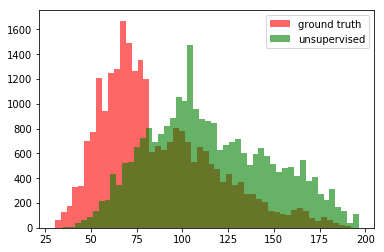

In [ ]:
ind =  np.argsort(np.abs(df2.rmse -float(df2.rmse.mean())))[0]
# plt.hist(im_semi["color"][ind].mean(axis=2).reshape(-1),label="rgb image",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_semi["depth"],axis=2).reshape(-1),color="r",label="ground truth",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_un["fake"],axis=2).reshape(-1),color="g",label="unsupervised",bins=50, histtype='stepfilled', alpha=0.6,)
# plt.hist(np.mean(im_semi["fake"],axis=2).reshape(-1),color="b",label="semi-supervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.legend()

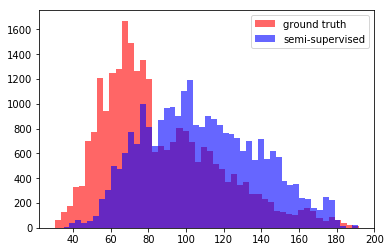

In [ ]:
ind =  np.argsort(np.abs(df2.rmse -float(df2.rmse.mean())))[0]
# plt.hist(im_semi["color"][ind].mean(axis=2).reshape(-1),label="rgb image",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_semi["depth"],axis=2).reshape(-1),color="r",label="ground truth",bins=50, histtype='stepfilled', alpha=0.6,)
# plt.hist(np.mean(im_un["fake"],axis=2).reshape(-1),color="g",label="unsupervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_semi["fake"],axis=2).reshape(-1),color="b",label="semi-supervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.legend()

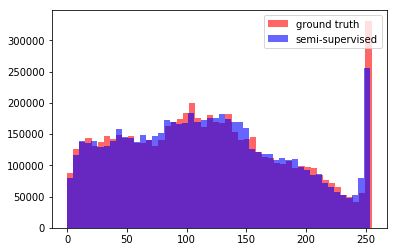

In [ ]:
ind =  np.argsort(np.abs(df2.rmse -float(df2.rmse.mean())))[0]
# plt.hist(im_semi["color"][ind].mean(axis=2).reshape(-1),label="rgb image",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_semi["color"],axis=3).reshape(-1),color="r",label="ground truth",bins=50, histtype='stepfilled', alpha=0.6,)
# plt.hist(np.mean(im_un["fake"],axis=2).reshape(-1),color="g",label="unsupervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.hist(np.mean(im_semi["cycle"],axis=3).reshape(-1),color="b",label="semi-supervised",bins=50, histtype='stepfilled', alpha=0.6,)
plt.legend()

In [ ]:
describe(np.mean(im_semi["depth"],axis=2))
print()
describe(np.mean(im_un["fake"],axis=2))
print()
describe(np.mean(im_semi["fake"],axis=2))

mean: 86.51718566894532
median: 78.419921875
std: 30.943548935865056
max: 191.9375
min: 30.16796875

mean: 115.28815902709961
median: 110.75
std: 33.4002106821561
max: 196.6015625
min: 34.8046875

mean: 108.34805221557617
median: 105.564453125
std: 30.272652216042303
max: 191.453125
min: 34.89453125


In [ ]:
describe(im_semi["fake"][ind])
print()
describe(im_semi["depth"][ind])
print()
describe(im_un["fake"][ind])

mean: 106.59498596191406
median: 93.0
std: 45.53347564890026
max: 215
min: 30

mean: 101.19197082519531
median: 88.0
std: 49.112377894590516
max: 215
min: 30

mean: 106.14578247070312
median: 92.0
std: 40.84319768073555
max: 215
min: 30


In [ ]:
print(df2.rmse[ind])
print(df1.rmse[ind])

8.410743164901511
10.814697747876714


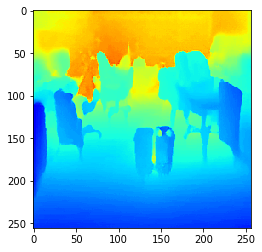

In [ ]:
plt.imshow(im_semi["fake"][ind],cmap="jet", vmin = 0, vmax =255)

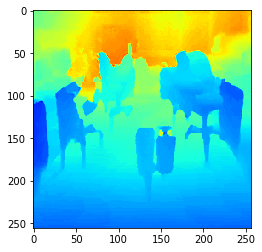

In [ ]:
plt.imshow(im_un["fake"][ind],cmap="jet", vmin = 0, vmax =255)

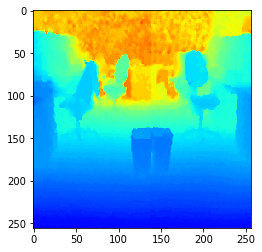

In [ ]:
plt.imshow(im_semi["depth"][ind],cmap="jet", vmin = 0, vmax =255)


In [ ]:
print(df2.rmse[ind])
print(df1.rmse[ind])

8.410743164901511
10.814697747876714
